In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='darkgrid')


In [2]:
df = pd.read_csv("SeoulBikeData.csv", encoding='ISO-8859-1')
df.head(60)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df['Temperature(°C)'].unique

<bound method Series.unique of 0      -5.2
1      -5.5
2      -6.0
3      -6.2
4      -6.0
       ... 
8755    4.2
8756    3.4
8757    2.6
8758    2.1
8759    1.9
Name: Temperature(°C), Length: 8760, dtype: float64>

In [4]:
df.shape

(8760, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Exploratory Data Analysis and Data Preprocessing

In [6]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [7]:
## Statistical description of features
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:

## Check for missing values
df.isnull().sum()


Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
## Convert the 'Date' variable to a datetime feature
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")

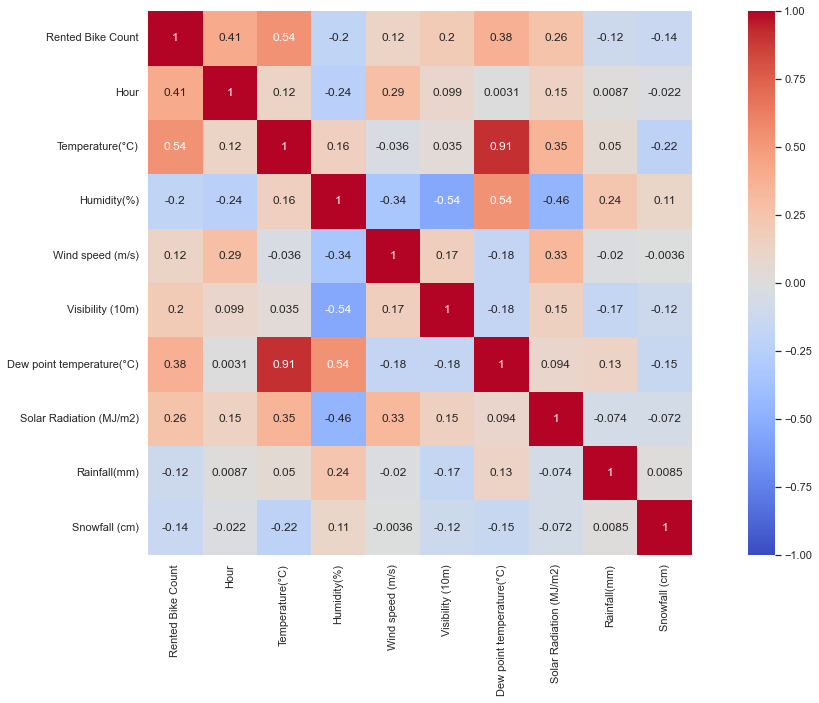

In [10]:
## Check correlation between the data
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

From the Correlation Matrix, we can see that the variables that are good predictors of the target variable(Rented Bike Count) are:
- Temperature
- Hour


There is a strong multicollinearlity between'Temperature(°C)' and 'Dew point temperature(°C)', so we can drop one of them.

In [11]:
df=df.drop(['Dew point temperature(°C)'],axis=1)

In [12]:
df1Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Solar Radiation (MJ/m2),0.261837
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


We can see that, Temperature and Hour are the highy correlated features to the target variable and hence are they the good predictors of the target variable.

## Data Preparation and Visualization

## Creating new Variables

In [13]:
## Variable to inform us whether it is night or day
df['label_day_night']=df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))

In [14]:
## We create a column feature which gives the day of the week and the month corresponding to the date
df['WeekDay']=df["Date"].dt.day_name() 

df['Month']=df['Date'].dt.month

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,Friday,12


## Plotting variables to the target

<AxesSubplot:xlabel='Date'>

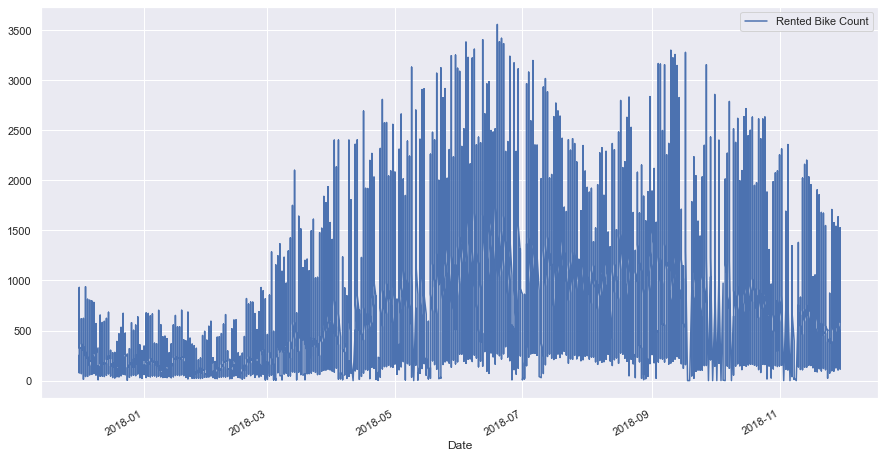

In [15]:
df.plot(x='Date',y='Rented Bike Count',kind='line', figsize=(15,8)) 
## On this first plot, we can see that the rental bike count is highly variable at each hour.


We can see that as we expected, summer is the season in which we have the most rents.
This is logical because people are mostly outside doing summer days when it is actually warm.

In [16]:
## Let's try to understand why summer is the season with the most rents
df_Seasons=pd.DataFrame(df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))
df_Seasons.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))


,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


Let's verify that it is linked to the solar Radiation


In [17]:
## This plot explains the high correlation with the feature 'solar Radiation' and 'Summer'
df_SolarRadiation=pd.DataFrame(df.groupby('Seasons').sum()['Solar Radiation (MJ/m2)'].sort_values(ascending=False))
df_SolarRadiation.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Solar Radiation (MJ/m2)
Seasons,
Summer,1680.850000
Spring,1520.840000
Autumn,1139.650000
Winter,644.070000


We can confirm from above that summer has the highest solar radiation so it makes sense that it has the highest bike count. As our earlier assumption that people are mostly outside during summer is true.

<AxesSubplot:ylabel='Rented Bike Count'>

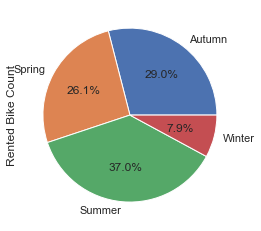

In [18]:
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)'>

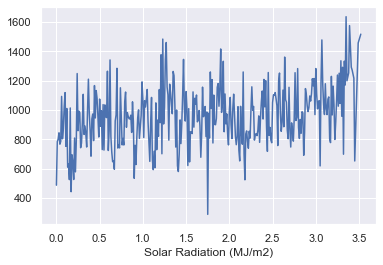

In [19]:
df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()


Here the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000


<AxesSubplot:xlabel='Hour'>

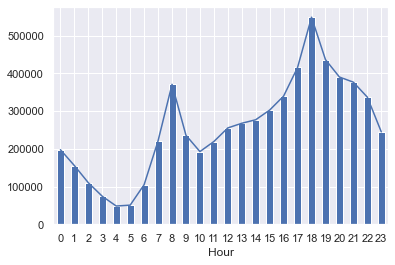

In [20]:
df.groupby('Hour').sum()['Rented Bike Count'].plot.bar()
df.groupby('Hour').sum()['Rented Bike Count'].plot()

Here we have a repartition of the rents by hour, at the beginning of the day. We suppose people go to work and return by bike


In [21]:
df_Days=pd.DataFrame(df.groupby('WeekDay').sum()['Rented Bike Count'].sort_values(ascending=False))
df_Days.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
WeekDay,
Friday,950334
Wednesday,923956
Monday,911743
Saturday,885492
Thursday,861999
Tuesday,858596
Sunday,780194


Days with highest rented bike are week days.
So we suppose people rent bikes to go to work or school

<AxesSubplot:xlabel='Temperature(°C)'>

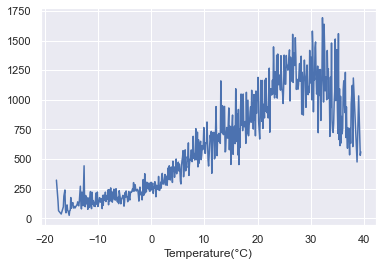

In [22]:
df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

people like to ride bikes when it is pretty hot around 25°C in average

<AxesSubplot:ylabel='Rented Bike Count'>

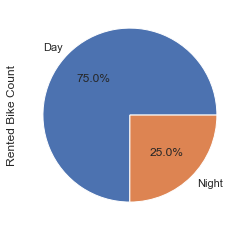

In [23]:
## Let's see the repartition of the rents following the moment of the day
df.groupby('label_day_night').sum()['Rented Bike Count'].plot.pie(autopct='%1.1f%%')


People tend to ride bike more in the day than night

<AxesSubplot:ylabel='Rented Bike Count'>

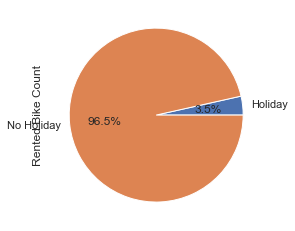

In [24]:
## Let's do a visualisation during the holidays
df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(autopct='%1.1f%%')


Mostly, people tend to rent bikes on non-holidays. It means that people probably rent bikes to go to school or work 



In [25]:
## We see that holiday rent are very low so let's see on which period extends holidays
dfHoliday=df.loc[df['Holiday'] == 'Holiday']
dfHoliday.shape

(432, 16)

The shape of this is 432 lines and 16 columns, it means that there are only 16 days of holidays which is very short. And that explains why the proportion of rents during holiday is low. So we understand that this column is not that important

## Let's plot the rent of bikes following the state of the weather

<AxesSubplot:xlabel='Rainfall(mm)'>

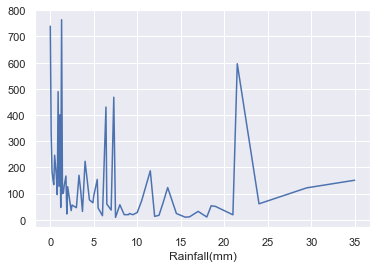

In [26]:
df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

We can see that, when it rain a lot people dont tend to rent bikes. Only in a few situations are bike rents higher when it rain. For example when we had around 20 mm of rain there is a big peak of rented bikes

In [27]:
## This raise between 20 and 25 mm of rainfall seems very contradictory, so we decide to explain this

df.loc[(df['Rainfall(mm)']>20)&(df['Rainfall(mm)']<25)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month
5034,2018-06-28,596,18,20.6,97,0.7,222,0.14,21.5,0.0,Summer,No Holiday,Yes,Day,Thursday,6
5132,2018-07-02,61,20,23.5,97,0.1,1814,0.04,24.0,0.0,Summer,No Holiday,Yes,Day,Monday,7
6524,2018-08-29,19,20,23.4,98,0.6,70,0.00,21.0,0.0,Summer,No Holiday,Yes,Day,Wednesday,8


We can see that these days of rainfall are in the summer and the T° is not bad, furthermore theses are Week Days, that's why we have so much rented bike even if the rain is so important

<AxesSubplot:xlabel='Snowfall (cm)'>

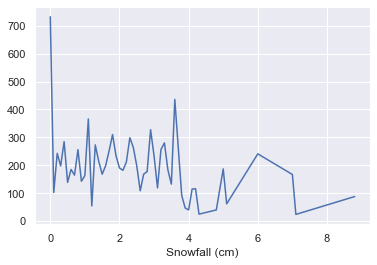

In [28]:
df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

We can see on the y-axis, the amount of rents is very low
When we have more than 4 cm of snow

In [29]:
## We create the variable to encode WeekDay
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

df['WeekDay']=df['WeekDay'].map(mapping_dictDay)


In [30]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,5,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,5,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,5,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,5,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,Night,5,12


## We have to keep in mind that the most correlated features to the target are :

- the hour
- the temperature

We have to drop some features that are not important to our target

In [31]:
df.drop(['Date','label_day_night','Seasons','Holiday','Functioning Day'],axis =1, inplace=True)
df.shape

(8760, 11)

In [32]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),WeekDay,Month
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,5,12
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,5,12
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,5,12
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,5,12
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,5,12


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   WeekDay                  8760 non-null   int64  
 10  Month                    8760 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 752.9 KB


## Feature Selection

In [34]:
X = df.drop(['Rented Bike Count'], axis=1)
y = df['Rented Bike Count']

## Model Building

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
import math

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [37]:
## Lets scale the data first
#from sklearn.preprocessing import StandardScaler

#scalerTrain = preprocessing.StandardScaler().fit(X_train)
#scalerTest = preprocessing.StandardScaler().fit(X_test)
#X_train_Scaled=scalerTrain.transform(X_train)
#X_test_Scaled=scalerTest.transform(X_test)

In [38]:
## Create an object to report the results
reporting_r2={}
reporting_rmse={}

## Decision Tree

In [39]:
dt = DecisionTreeRegressor().fit(X_train,y_train)
dt_pred1 = dt.predict(X_test)
dtRMSE = math.sqrt(mean_squared_error(dt_pred1, y_test))
print("RMSE: ", dtRMSE)

RMSE:  366.927283055142


In [40]:

dt_param = {  "criterion": ['squared_error','absolute_error'],
              "max_depth": [2, 6, 8,10,12,14,16],
              
              }

dt_gridsearch =GridSearchCV(estimator=dt,param_grid=dt_param,scoring=['r2','neg_root_mean_squared_error'],
                            refit='neg_root_mean_squared_error',
                            cv=10, n_jobs=-2)
dt_gridsearch.fit(X_train.values,y_train)

print(dt_gridsearch.best_estimator_)

DecisionTreeRegressor(criterion='absolute_error', max_depth=10)


In [41]:
%%time
dt_model = DecisionTreeRegressor(criterion='absolute_error',max_depth=10).fit(X_train,y_train)


CPU times: total: 688 ms
Wall time: 712 ms


In [42]:
# make predictions
dt_pred = dt_model.predict(X_test)

dt_RMSE =  math.sqrt(mean_squared_error(dt_pred, y_test))
R2_score_dt = r2_score(y_test, dt_pred)*100
bestDecisionTree_testScore = (dt_gridsearch.best_score_)*100
# print RMSE
print("RMSE: ", dt_RMSE)

RMSE:  317.97652856287203


In [43]:
reporting_r2['Decision Tree Regressor']=bestDecisionTree_testScore
reporting_rmse['Decision Tree Regressor']= dt_RMSE

## Random Forest Regressor

In [44]:
rf = RandomForestRegressor().fit(X_train,y_train)
rf_pred1 = rf.predict(X_test)
rfRMSE = math.sqrt(mean_squared_error(rf_pred1, y_test))
print("RMSE: ", rfRMSE)

RMSE:  255.06133875740844


In [45]:

## make a dictionary of hyparameter values to search
rf_param = {"criterion": ['squared_error', 'absolute_error', 'poisson'],
                 'n_estimators' : [int(x) for x in np.linspace(start=10,stop=200 , num=10)],
                 
            }
rf_gridsearch = GridSearchCV(estimator=rf,
                            param_grid=rf_param, 
                            scoring=['r2','neg_root_mean_squared_error'],
                            refit = 'neg_root_mean_squared_error',
                            cv = 10, n_jobs=-1)

rf_gridsearch.fit(X_train.values,y_train)

print(rf_gridsearch.best_estimator_) # Get complete details of the best model

RandomForestRegressor(n_estimators=200)


In [46]:
print(rf_gridsearch.best_params_) # get the best parameters

{'criterion': 'squared_error', 'n_estimators': 200}


In [47]:
%%time
## train the model with the best parameters
rf_model = RandomForestRegressor(criterion='squared_error', n_estimators=200).fit(X_train,y_train)


CPU times: total: 3.77 s
Wall time: 3.81 s


In [48]:
# make predictions
rf_pred = rf_model.predict(X_test)

rf_RMSE =  math.sqrt(mean_squared_error(rf_pred, y_test))
R2_score_rf = r2_score(y_test, rf_pred)*100
rf_score = (rf_gridsearch.best_score_)*100
# print RMSE
print("RMSE: %.2f" % rf_RMSE)


RMSE: 252.59


In [49]:
reporting_r2['Random Forest Regressor']=rf_score
reporting_rmse['Random Forest Regressor']=rf_RMSE

## Extra Tree Regressor

In [50]:
etr = ExtraTreesRegressor().fit(X_train,y_train)
etr_pred1 = etr.predict(X_test)
etrRMSE = math.sqrt(mean_squared_error(etr_pred1, y_test))
print("RMSE: ", etrRMSE)

RMSE:  250.50558452237144


In [51]:
etr_param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=500, num=10)],
             "criterion": ['squared_error', 'friedman_mse'],
             

            }

etr_gridsearch = GridSearchCV(estimator=etr, param_grid=etr_param,
                             scoring=['r2','neg_root_mean_squared_error'],
                             refit = 'neg_root_mean_squared_error',
                             cv = 10, n_jobs=-1
                             )

etr_gridsearch.fit(X_train.values, y_train)

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391,
                                          445, 500]},
             refit='neg_root_mean_squared_error',
             scoring=['r2', 'neg_root_mean_squared_error'])

In [52]:
print(etr_gridsearch.best_estimator_)

ExtraTreesRegressor(n_estimators=445)


In [53]:
print(etr_gridsearch.best_params_)

{'criterion': 'squared_error', 'n_estimators': 445}


In [54]:
%%time
## train model with best parameters
etr_model = ExtraTreesRegressor(criterion='squared_error', n_estimators=445).fit(X_train,y_train)



CPU times: total: 5.5 s
Wall time: 5.54 s


In [55]:
# make predictions
etr_pred = etr_model.predict(X_test)

etr_RMSE =  math.sqrt(mean_squared_error(etr_pred, y_test))
R2_score_etr = r2_score(y_test, etr_pred)*100
etr_score = (etr_gridsearch.best_score_)*100
# print RMSE
print("RMSE: %.2f" % etr_RMSE)
# print R2
print("R2 Score: %.2f" % R2_score_etr )


RMSE: 247.46
R2 Score: 85.04


In [56]:
reporting_r2['Extra Tree Regressor']=etr_score
reporting_rmse['Extra Tree Regressor']=etr_RMSE

## Gradient Boost

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor().fit(X_train,y_train)
gbr_pred1 = gbr.predict(X_test)
gbrRMSE = math.sqrt(mean_squared_error(gbr_pred1, y_test))
print("RMSE: ", gbrRMSE)

RMSE:  298.74574205864803


In [58]:
gbr_param = {
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'criterion': ['friedman_mse', 'squared_error'],
    'n_estimators': [int(x) for x in np.linspace(start=100,stop=800, num=10)],
    'learning_rate': [0.1,0.15,0.4],
    
}

In [59]:
gbr_gridsearch = GridSearchCV(estimator=gbr, param_grid=gbr_param,
                             scoring=['r2','neg_root_mean_squared_error'],
                             refit = 'neg_root_mean_squared_error',
                             cv = 10, n_jobs=-2
                             )

gbr_gridsearch.fit(X_train.values, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-2,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.15, 0.4],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'n_estimators': [100, 177, 255, 333, 411, 488, 566,
                                          644, 722, 800]},
             refit='neg_root_mean_squared_error',
             scoring=['r2', 'neg_root_mean_squared_error'])

In [62]:
print(gbr_gridsearch.best_estimator_)

GradientBoostingRegressor(learning_rate=0.15, n_estimators=644)


In [63]:
print(gbr_gridsearch.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.15, 'loss': 'squared_error', 'n_estimators': 644}


In [64]:
%%time
## train model with best parameters
gbr_model = GradientBoostingRegressor(criterion='squared_error', learning_rate=0.15, n_estimators=644).fit(X_train,y_train)

CPU times: total: 3.56 s
Wall time: 3.64 s


In [65]:
# make predictions
gbr_pred = gbr_model.predict(X_test)

gbr_RMSE =  math.sqrt(mean_squared_error(gbr_pred, y_test))
R2_score_gbr = r2_score(y_test, gbr_pred)*100
gbr_score = (gbr_gridsearch.best_score_)*100
# print RMSE
print("RMSE: %.2f" % gbr_RMSE)
# print R2
print("R2 Score: %.2f" % R2_score_gbr )


RMSE: 255.74
R2 Score: 84.02


In [66]:
reporting_r2['Gradient Boost']=gbr_score
reporting_rmse['Gradient Boost']=gbr_RMSE

## Results

In [67]:
# RMSE Results
df_results=pd.DataFrame()
df_results['model']=reporting_rmse.keys()
df_results['RMSE']=reporting_rmse.values()

df_results=df_results.set_index('model')


In [68]:
dfVizModels=pd.DataFrame(df_results['RMSE'].sort_values(ascending=False))
dfVizModels.style.background_gradient(cmap=sns.light_palette("green", reverse='True', as_cmap=True))

,RMSE
model,
Decision Tree Regressor,317.976529
Gradient Boost,255.739697
Random Forest Regressor,252.588976
Extra Tree Regressor,247.458991


From the results above, it is evident that the Extra Tree regressor is the best performing model.

## Feature Importance

In [69]:
importances = rf_model.feature_importances_

# view the feature scores
feature_scores = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
feature_scores

Temperature(°C)            0.350082
Hour                       0.283295
Solar Radiation (MJ/m2)    0.102538
Humidity(%)                0.085623
WeekDay                    0.046440
Month                      0.044234
Rainfall(mm)               0.035415
Visibility (10m)           0.026444
Wind speed (m/s)           0.025375
Snowfall (cm)              0.000555
dtype: float64

## Visualize the feature scores

<AxesSubplot:>

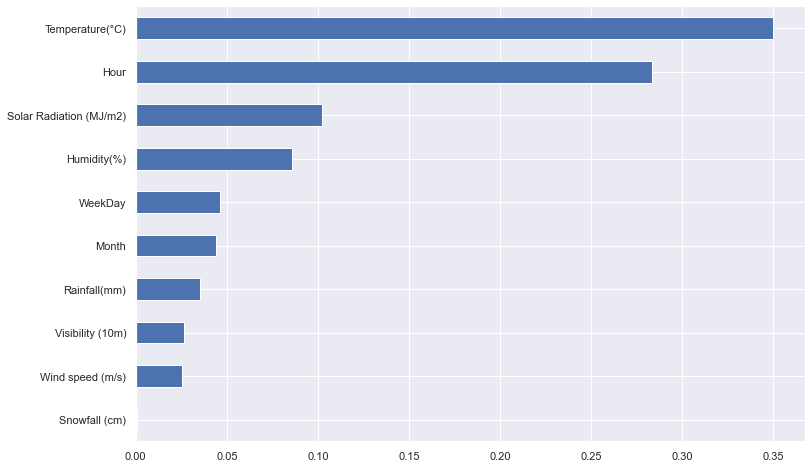

In [70]:
importances = pd.Series(rf_model.feature_importances_,index=X.columns)
importances.sort_values().plot(kind='barh', 
                 figsize=(12,8))

It is evident from the graph that, the temperature and Hour of the day are the most important features and Snowfall is the least important feature

## Save Model

In [71]:
import pickle
pickle.dump(etr_model, open("model.pkl",'wb'))


In [72]:
##load the model
model=pickle.load(open("model.pkl",'rb'))

In [73]:
X.tail()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),WeekDay,Month
8755,19,4.2,34,2.6,1894,0.0,0.0,0.0,5,11
8756,20,3.4,37,2.3,2000,0.0,0.0,0.0,5,11
8757,21,2.6,39,0.3,1968,0.0,0.0,0.0,5,11
8758,22,2.1,41,1.0,1859,0.0,0.0,0.0,5,11
8759,23,1.9,43,1.3,1909,0.0,0.0,0.0,5,11


In [97]:
print(model.predict([[19,4.2,34,2.6,1894,0.0,0.0,0.0,5,11]]))


[1003.]


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
